# Start

In [1]:
# Code pour vider un dossier
import os
import shutil

def clear_directory(path):
    """
    Supprime récursivement tout le contenu d'un répertoire donné,
    puis recrée le répertoire vide.
    """
    if os.path.exists(path):
        print(f"Suppression du contenu du dossier : {path}")
        shutil.rmtree(path)
        print(f"Dossier {path} et son contenu supprimés.")
    else:
        print(f"Le dossier {path} n'existe pas, pas de suppression nécessaire.")

    os.makedirs(path, exist_ok=True)
    print(f"Dossier {path} recréé et vide.")

# --- Exemple d'utilisation (décommenter et remplacer 'YOUR_PATH_HERE') ---
# ATTENTION: Assurez-vous que le chemin est correct, cette opération est irréversible.
path_to_clear = "/content/drive/MyDrive/P8/Experiences"
clear_directory(path_to_clear)


Le dossier /content/drive/MyDrive/P8/Experiences n'existe pas, pas de suppression nécessaire.
Dossier /content/drive/MyDrive/P8/Experiences recréé et vide.


## Imports

In [24]:
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, applications
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import callbacks, losses, optimizers
import mlflow
from pathlib import Path
import mlflow
import pandas as pd

In [2]:
import os
import numpy as np
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import callbacks, losses, metrics, optimizers

!pip install mlflow -q
!pip install Pillow -q
import mlflow
import mlflow.tensorflow

print("TensorFlow version:", tf.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 150.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.4 MB/s eta 0:00:00
TensorFlow version: 2.19.0


In [3]:
from tensorflow.keras import mixed_precision

# Activation de la politique "mixed_float16"
# Cela permet d'utiliser des float16 pour les calculs (rapide) et float32 pour les variables (stable)
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

print('Mixed precision policy:', policy.compute_dtype)

Mixed precision policy: float16


## CONFIG PATHS

In [4]:
import os
from pathlib import Path
import mlflow

# --- CENTRALISATION DES CHEMINS (DRIVE) ---
PROJECT_ROOT = Path("/content/drive/MyDrive/P8")

# 1. Dossier Racine "Experiences"
EXP_ROOT = PROJECT_ROOT / "Experiences"

# 2. Sous-dossiers
# SEPARATION IMPORTANTE : On isole les logs MLflow dans 'mlruns'
# pour éviter qu'il ne scanne 'checkpoints' ou 'Models' comme des expériences.
MLFLOW_TRACKING_DIR = EXP_ROOT / "mlruns"
CHECKPOINTS_DIR     = EXP_ROOT / "checkpoints"
MODELS_DIR          = EXP_ROOT / "Models"
ARTIFACTS_DIR       = EXP_ROOT / "artefacts"

# Création automatique de l'arborescence
for path in [EXP_ROOT, MLFLOW_TRACKING_DIR, CHECKPOINTS_DIR, MODELS_DIR, ARTIFACTS_DIR]:
    if not path.exists():
        print(f"📁 Création dossier : {path}")
        path.mkdir(parents=True, exist_ok=True)

# Configuration MLflow immédiate
mlflow.set_tracking_uri("file://" + str(MLFLOW_TRACKING_DIR))

print("\n✅ CONFIGURATION TERMINÉE (Structure corrigée)")
print(f"📡 MLflow Tracking URI : {mlflow.get_tracking_uri()}")
print(f"💾 Checkpoints : {CHECKPOINTS_DIR}")
print(f"📦 Modèles Finaux : {MODELS_DIR}")

📁 Création dossier : /content/drive/MyDrive/P8/Experiences/mlruns
📁 Création dossier : /content/drive/MyDrive/P8/Experiences/checkpoints
📁 Création dossier : /content/drive/MyDrive/P8/Experiences/Models
📁 Création dossier : /content/drive/MyDrive/P8/Experiences/artefacts

✅ CONFIGURATION TERMINÉE (Structure corrigée)
📡 MLflow Tracking URI : file:///content/drive/MyDrive/P8/Experiences/mlruns
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints
📦 Modèles Finaux : /content/drive/MyDrive/P8/Experiences/Models


In [5]:
import os
from pathlib import Path
import mlflow

# Get the currently configured MLflow tracking URI
# Ensure MLFLOW_TRACKING_DIR is defined, if not, re-evaluate previous cells or set it here.
# Assuming MLFLOW_TRACKING_DIR from cell 'vzdfsFXfMy9c' is available:
mlflow_tracking_path = Path(mlflow.get_tracking_uri().replace("file://", ""))
mlflow_trash_dir = mlflow_tracking_path / ".trash"

# Create the .trash directory if it does not exist
if not mlflow_trash_dir.exists():
    try:
        mlflow_trash_dir.mkdir(parents=True, exist_ok=True)
        print(f"📁 Dossier MLflow .trash créé : {mlflow_trash_dir}")
    except Exception as e:
        print(f"⚠️ Erreur lors de la création du dossier MLflow .trash : {e}")
else:
    print(f"📁 Le dossier MLflow .trash existe déjà : {mlflow_trash_dir}")


📁 Dossier MLflow .trash créé : /content/drive/MyDrive/P8/Experiences/mlruns/.trash


## Mounting Drive

In [6]:
import os
import shutil
from google.colab import drive

mount_point = '/content/drive'

# Check if the mount point exists and has contents
if os.path.exists(mount_point) and os.listdir(mount_point):
    print(f"Clearing existing contents in {mount_point} before mounting...")
    try:
        # Try to unmount first, in case it's a partially mounted or stale mount.
        # This command is often necessary before trying to clear or remount.
        _ = !fusermount -uz {mount_point}
        print(f"Successfully unmounted {mount_point}.")
    except Exception as e:
        print(f"Could not unmount {mount_point}: {e}. Proceeding with clearing directory.")

    # Remove all contents from the directory. If it was a broken mount, this cleans up.
    # If it's just a directory with files, this clears it for the mount.
    for item in os.listdir(mount_point):
        item_path = os.path.join(mount_point, item)
        try:
            if os.path.islink(item_path) or os.path.isfile(item_path):
                os.remove(item_path)
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)
        except Exception as e:
            print(f"Error removing {item_path}: {e}. This might prevent successful mounting.")
            # We don't want to halt execution here, as drive.mount will raise if it's still an issue.

drive.mount(mount_point, force_remount=True)

Clearing existing contents in /content/drive before mounting...
Successfully unmounted /content/drive.
Mounted at /content/drive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Initializing Repository

In [8]:
import os
import glob

# 1. Définition des Chemins
# DRIVE_SOURCE = "/content/drive/MyDrive/P8"   # Là où sont stockés vos zips (Source lente)
DRIVE_SOURCE = "/content/drive/MyDrive/P8/Data" # Essayez celui-ci si le premier ne trouve rien

LOCAL_DEST = "/content/P8/Data"              # Là où on veut travailler (Destination rapide)

print(f"🔄 Initialisation de la copie : Drive -> {LOCAL_DEST}")

if not os.path.exists(LOCAL_DEST):
    os.makedirs(LOCAL_DEST)

# 2. Recherche automatique des fichiers ZIP sur le Drive
# On cherche tout ce qui commence par 'P8_Cityscapes' et finit par '.zip'
found_zips = glob.glob(os.path.join(DRIVE_SOURCE, "**", "P8_Cityscapes*.zip"), recursive=True)

if not found_zips:
    print("❌ ERREUR CRITIQUE : Aucun fichier zip trouvé dans le Drive !")
    print(f"J'ai cherché dans : {DRIVE_SOURCE}")
    print("Vérifiez le chemin exact dans la colonne de gauche 'drive > MyDrive > ...'")
else:
    print(f"✅ Fichiers ZIP trouvés sur le Drive : {len(found_zips)}")
    for zip_file in found_zips:
        print(f"   -> Copie et Décompression de : {os.path.basename(zip_file)} ...")
        # Unzip silencieux (-q) mais avec écrasement (-o) vers le dossier local
        !unzip -q -o "{zip_file}" -d "{LOCAL_DEST}"

    print("\n🎉 SUCCESS : Toutes les données sont prêtes sur le Disque Rapide !")

    # 3. Configuration des variables GLOBALES
    IMG_DIR = os.path.join(LOCAL_DEST, "leftImg8bit")
    MASK_DIR = os.path.join(LOCAL_DEST, "gtFine")

    print(f"📁 IMG_DIR = {IMG_DIR}")
    if os.path.exists(IMG_DIR):
         print(f"   Contenu : {os.listdir(IMG_DIR)}")
    else:
         print("⚠️ Attention : Le dossier leftImg8bit n'est pas apparu. Vérifiez la structure du zip.")

🔄 Initialisation de la copie : Drive -> /content/P8/Data
✅ Fichiers ZIP trouvés sur le Drive : 2
   -> Copie et Décompression de : P8_Cityscapes_gtFine_trainvaltest.zip ...
   -> Copie et Décompression de : P8_Cityscapes_leftImg8bit_trainvaltest.zip ...

🎉 SUCCESS : Toutes les données sont prêtes sur le Disque Rapide !
📁 IMG_DIR = /content/P8/Data/leftImg8bit
   Contenu : ['train', 'val', 'test']


# Data Preparing

## Loading Data

In [9]:
from pathlib import Path
import os

# --- 1. CONFIGURATION DES CHEMINS ---

# DRIVE (Stockage Permanent Résultats)
PROJECT_ROOT = Path("/content/drive/MyDrive/P8")

# LOCAL (Stockage Temporaire Rapide pour Données)
# C'est ici que le script 'unzip' a déposé les images
DATA_DIR_LOCAL = Path("/content/P8/Data")

IMG_DIR = DATA_DIR_LOCAL / "leftImg8bit"
MASK_DIR = DATA_DIR_LOCAL / "gtFine"

# Vérification
print(f"📂 INPUT (Lecture Rapide) : {IMG_DIR} -> Exists? {IMG_DIR.exists()}")
print(f"💾 OUTPUT (Sauvegarde Drive) : {PROJECT_ROOT} -> Exists? {PROJECT_ROOT.exists()}")

if not IMG_DIR.exists():
    print("⚠️ ATTENTION : Les données locales ne sont pas trouvées. Avez-vous lancé le script 'Unzip' ?")

📂 INPUT (Lecture Rapide) : /content/P8/Data/leftImg8bit -> Exists? True
💾 OUTPUT (Sauvegarde Drive) : /content/drive/MyDrive/P8 -> Exists? True


In [10]:
print("Cities train images:", os.listdir(os.path.join(IMG_DIR, "train"))[:3])
print("Cities train masks:", os.listdir(os.path.join(MASK_DIR, "train"))[:3])

Cities train images: ['tubingen', 'dusseldorf', 'zurich']
Cities train masks: ['tubingen', 'dusseldorf', 'zurich']


## Fonction de listing image / masque

In [11]:
from glob import glob
from PIL import Image

def get_file_pairs(split="train"):
    img_paths = []
    mask_paths = []

    for city in os.listdir(os.path.join(IMG_DIR, split)):
        city_img_dir = os.path.join(IMG_DIR, split, city)
        city_mask_dir = os.path.join(MASK_DIR, split, city)

        for img_file in glob(os.path.join(city_img_dir, "*_leftImg8bit.png")):
            mask_file = os.path.join(
                city_mask_dir,
                os.path.basename(img_file).replace(
                    "_leftImg8bit.png",
                    "_gtFine_labelIds.png"
                )
            )

            if os.path.exists(mask_file):
                try:
                    with Image.open(img_file) as img_pil:
                        img_pil.verify()
                    with Image.open(mask_file) as mask_pil:
                        mask_pil.verify()

                    img_paths.append(img_file)
                    mask_paths.append(mask_file)
                except Exception as e:
                    print(f"Skipping corrupted image/mask pair (INVALID PNG DATA): {img_file}, {mask_file} - Error: {e}")
            else:
                print(f"Skipping image due to missing mask file: {img_file}")

    return img_paths, mask_paths


## Test du chargement des chemins

In [12]:
train_imgs, train_masks = get_file_pairs("train")
val_imgs, val_masks = get_file_pairs("val")

print(f"Train images: {len(train_imgs)}")
print(f"Val images: {len(val_imgs)}")

print(train_imgs[0])
print(train_masks[0])

Train images: 2975
Val images: 500
/content/P8/Data/leftImg8bit/train/tubingen/tubingen_000018_000019_leftImg8bit.png
/content/P8/Data/gtFine/train/tubingen/tubingen_000018_000019_gtFine_labelIds.png


## Chargement image + masque

In [13]:
import cv2
import numpy as np

IMG_HEIGHT = 256
IMG_WIDTH = 512

CITYSCAPES_TO_8 = {
    7: 0, 8: 0,
    11: 1, 12: 1,
    13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2,
    24: 3, 25: 3,
    21: 4,
    23: 5,
    19: 6, 20: 6, 22: 6,
    9: 7, 10: 7, 0: 7
}

def load_image_mask(img_path, mask_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT),
                      interpolation=cv2.INTER_NEAREST)

    new_mask = np.zeros_like(mask)
    for k, v in CITYSCAPES_TO_8.items():
        new_mask[mask == k] = v

    return img.astype(np.float32), new_mask.astype(np.uint8)


In [14]:
import tensorflow as tf

# --- Paramètres du Pipeline ---
IMG_HEIGHT = 224  # Compatible MobileNetV2
IMG_WIDTH = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# --- Mapping des Classes ---
# 0:flat, 1:human, 2:vehicle, 3:construction, 4:object, 5:nature, 6:sky, 7:void
MAPPING_LIST = [
    7, 7, 7, 7, 7, 7, 7, # 0-6: void
    0, 0, 0, 0,          # 7-10: flat
    3, 3, 3, 3, 3, 3,    # 11-16: construction
    4, 4, 4, 4,          # 17-20: object
    5, 5,                # 21-22: nature
    6,                   # 23: sky
    1, 1,                # 24-25: human
    2, 2, 2, 2, 2, 2, 2, 2, # 26-33: vehicle
    7                    # 34: license plate
]
# Création d'un tenseur de lookup pour mapper rapidement les pixels
MAPPING_TENSOR = tf.constant(MAPPING_LIST + [7] * (256 - len(MAPPING_LIST)), dtype=tf.int32)

def parse_image_mask(img_path, mask_path):
    """ Chargement et prétraitement d'une image et de son masque """
    # 1. Image
    img = tf.io.read_file(img_path)
    img = tf.io.decode_png(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # Normalisation [0,1]
    img = tf.cast(img, tf.float32) / 255.0

    # 2. Masque
    mask = tf.io.read_file(mask_path)
    mask = tf.io.decode_png(mask, channels=1)
    # Important : nearest neighbor pour ne pas interpoler les classes
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
    mask = tf.cast(mask, tf.int32)

    # 3. Mapping des classes
    mask = tf.gather(MAPPING_TENSOR, mask)

    return img, mask

def augment(img, mask):
    """ Data Augmentation appliquée simultanément à l'image et au masque """
    # Flip Horizontal
    if tf.random.uniform(()) > 0.5:
        img = tf.image.flip_left_right(img)
        mask = tf.image.flip_left_right(mask)

    # Luminosité (Image seulement)
    img = tf.image.random_brightness(img, max_delta=0.1)

    # Contraste (Image seulement)
    img = tf.image.random_contrast(img, lower=0.9, upper=1.1)

    return img, mask

def create_dataset(img_paths, mask_paths, training=False, augment_data=False):
    """ Création du Dataset TensorFlow optimisé """
    # Création du dataset de chemins
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, mask_paths))

    # Shuffle (uniquement pour le train)
    if training:
        dataset = dataset.shuffle(buffer_size=1000)

    # Chargement et Parsing (Parallélisé)
    dataset = dataset.map(parse_image_mask, num_parallel_calls=AUTOTUNE)

    # Augmentation (uniquement pour le train si demandé)
    if training and augment_data:
        dataset = dataset.map(augment, num_parallel_calls=AUTOTUNE)

    # Batching et Prefetching (Performance)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)

    return dataset

## Creating Datasets

In [15]:
# Création des datasets
# Train avec augmentation
train_ds_aug = create_dataset(train_imgs, train_masks, training=True, augment_data=True)
# Train sans augmentation (pour comparaison)
train_ds_no_aug = create_dataset(train_imgs, train_masks, training=True, augment_data=False)
# Validation (jamais d'augmentation)
val_ds = create_dataset(val_imgs, val_masks, training=False)

print(f"Datasets créés. Batch size: {BATCH_SIZE}")
# Vérification d'un batch
for img, mask in train_ds_aug.take(1):
    print(f"Image shape: {img.shape}, Type: {img.dtype}")
    print(f"Mask shape: {mask.shape}, Type: {mask.dtype}")

Datasets créés. Batch size: 32
Image shape: (32, 224, 224, 3), Type: <dtype: 'float32'>
Mask shape: (32, 224, 224, 1), Type: <dtype: 'int32'>


## Visualisation d’un exemple

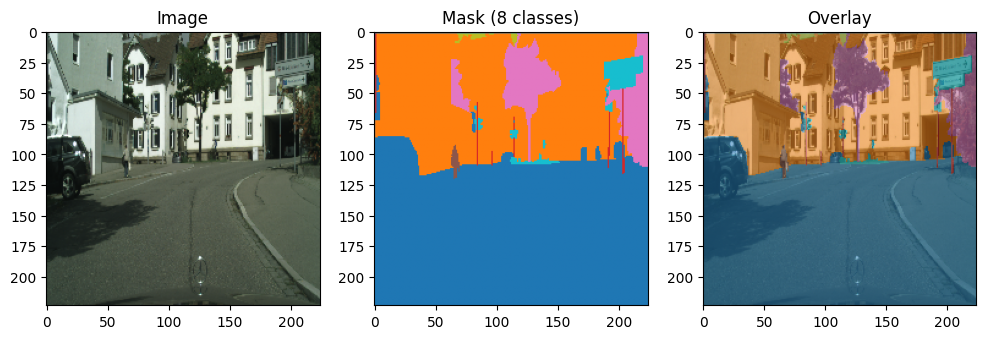

In [16]:
import matplotlib.pyplot as plt

img, mask = load_image_mask(train_imgs[0], train_masks[0])

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="tab10")
plt.title("Mask (8 classes)")

plt.subplot(1,3,3)
plt.imshow(img)
plt.imshow(mask, cmap="tab10", alpha=0.5)
plt.title("Overlay")

plt.show()

# Modeling

## Model Unet

In [ ]:
def build_refined_unet(input_shape, num_classes=8):
    inputs = layers.Input(input_shape)

    # Fonction utilitaire pour un bloc conv (Conv -> BN -> ReLU)
    def conv_block(x, filters):
        x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        return x

    # -------- Encoder (Downsampling) --------
    # Block 1
    c1 = conv_block(inputs, 16)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Block 2
    c2 = conv_block(p1, 32)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Block 3
    c3 = conv_block(p2, 64)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Block 4 (Bottleneck)
    c4 = conv_block(p3, 128)
    # Dropout pour régularisation
    c4 = layers.Dropout(0.2)(c4)

    # -------- Decoder (Upsampling) --------
    # Block 5
    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c4)
    u5 = layers.Concatenate()([u5, c3])
    c5 = conv_block(u5, 64)

    # Block 6
    u6 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = layers.Concatenate()([u6, c2])
    c6 = conv_block(u6, 32)

    # Block 7
    u7 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = layers.Concatenate()([u7, c1])
    c7 = conv_block(u7, 16)

    # Output Layer
    # dtype='float32' est crucial si on utilise Mixed Precision pour la sortie finale
    outputs = layers.Conv2D(num_classes, 1, activation="softmax", dtype='float32')(c7)

    return models.Model(inputs, outputs, name="Light_UNet")

# Création du modèle avec les dimensions du pipeline
model_unet = build_refined_unet(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), # Utilise les variables globales
    num_classes=8
)

model_unet.summary()

Model: "Light_UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │      2,320 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │      9,248 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]  

 Total params: 484,968 (1.85 MB)

 Trainable params: 483,560 (1.84 MB)

 Non-trainable params: 1,408 (5.50 KB)

### Loss function for optimizing models

In [21]:
# --- Définition de la Dice Loss Custom ---
def dice_loss(y_true, y_pred):
    """
    Dice Loss pour segmentation multiclasse
    y_true: labels sparse (batch, h, w, 1) ou (batch, h, w)
    y_pred: probabilités (batch, h, w, num_classes)
    """
    y_true = tf.cast(y_true, tf.int32)
    # One-hot encoding du masque réel pour matcher la forme de y_pred
    y_true_one_hot = tf.one_hot(tf.squeeze(y_true), depth=8) # 8 classes

    numerator = 2 * tf.reduce_sum(y_true_one_hot * y_pred, axis=(0,1,2))
    denominator = tf.reduce_sum(y_true_one_hot + y_pred, axis=(0,1,2))

    # Dice par classe (ajout d'un epsilon pour éviter division par 0)
    dice_score = (numerator + 1e-7) / (denominator + 1e-7)

    # On renvoie 1 - dice_moyen
    return 1 - tf.reduce_mean(dice_score)

# --- Définition de la Loss Combinée (Combo Loss) ---
def combo_loss(y_true, y_pred):
    # Poids pour équilibrer (souvent 1:1 marche bien)
    ce = losses.sparse_categorical_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return ce + dice

# --- Mise à jour de la configuration ---
# On utilise maintenant notre combo_loss au lieu de juste Crossentropy
# loss_fn = losses.SparseCategoricalCrossentropy()  <-- Ancienne
loss_fn = combo_loss  # <-- Nouvelle
optimizer = optimizers.Adam(learning_rate=1e-3)

### Training function

In [19]:


# # --- 1. CONFIGURATION DES CHEMINS (DRIVE) ---
# # On centralise tout ici pour éviter le bazar
# DRIVE_ROOT = Path("/content/drive/MyDrive/P8")
# EXP_ROOT = DRIVE_ROOT / "Experiences"

# # Sous-dossiers conformes à votre README
# CHECKPOINTS_DIR = EXP_ROOT / "checkpoints"
# MODELS_DIR = EXP_ROOT / "Models"
# MLFLOW_TRACKING_DIR = EXP_ROOT  # MLflow créera 'mlruns' ou '0' dedans

# # Création de l'arborescence si absente
# for path in [EXP_ROOT, CHECKPOINTS_DIR, MODELS_DIR]:
#     if not path.exists():
#         print(f"📁 Création dossier : {path}")
#         path.mkdir(parents=True, exist_ok=True)

# # Configuration MLflow pour écrire sur le Drive
# mlflow.set_tracking_uri("file://" + str(MLFLOW_TRACKING_DIR))
# print(f"📡 MLflow connecté : {mlflow.get_tracking_uri()}")


# --- 2. CONFIGURATION OPTIMIZER & LOSS ---
# On utilise la loss Dice+CE définie précédemment (ou SCCE par défaut)
try:
    loss_fn = combo_loss
    print("✅ Utilisation de la 'combo_loss' (Dice + Crossentropy)")
except NameError:
    print("⚠️ 'combo_loss' introuvable, utilisation de SparseCategoricalCrossentropy")
    loss_fn = losses.SparseCategoricalCrossentropy()

optimizer = optimizers.Adam(learning_rate=1e-3)


# --- 3. FONCTION TRAIN_MODEL (Version Finale) ---
def train_model(model, train_ds, val_ds, run_name, epochs=15):
    print(f"\n🚀 DÉMARRAGE RUN : {run_name}")

    # A. Préparation Checkpoint (Sur le Drive)
    run_ckpt_dir = CHECKPOINTS_DIR / run_name
    if not run_ckpt_dir.exists():
        run_ckpt_dir.mkdir(parents=True, exist_ok=True)

    ckpt_path = str(run_ckpt_dir / "best_model.keras")
    print(f"💾 Checkpoints : {ckpt_path}")

    # B. Callbacks
    ckpt_callback = callbacks.ModelCheckpoint(
        filepath=ckpt_path,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )
    es_callback = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # C. Compilation
    # Ajout de run_eagerly=True pour éviter le problème avec LossScaleOptimizer et le mode graph.
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'], run_eagerly=True)

    # D. MLflow Run
    # On force l'expérience pour être sûr
    mlflow.set_experiment("Segmentation_P8")

    with mlflow.start_run(run_name=run_name) as run:
        # Log params
        mlflow.log_params({
            "model": model.name,
            "epochs": epochs,
            "optimizer": "adam",
            "loss": "combo_loss" if loss_fn == combo_loss else "scce"
        })

        # Autolog (courbes) sans les modèles lourds
        mlflow.tensorflow.autolog(log_models=False)

        # Entraînement
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[ckpt_callback, es_callback]
        )

        # --- E. Évaluation Détaillée (IoU / Dice) ---
        print("\n📊 Calcul des métriques détaillées par classe...")
        total_cm = np.zeros((8, 8))

        for images, masks in val_ds:
            preds = model.predict(images, verbose=0)
            preds_cls = np.argmax(preds, axis=-1)
            masks_np = masks.numpy().flatten()
            preds_np = preds_cls.flatten()

            # Confusion Matrix
            cm = tf.math.confusion_matrix(masks_np, preds_np, num_classes=8).numpy()
            total_cm += cm

        # Calculs
        iou_list = []
        dice_list = []
        classes = ['flat', 'human', 'vehicle', 'construction', 'object', 'nature', 'sky', 'void']

        print(f"\n{'CLASSE':<12} | {'IoU':<8} | {'Dice':<8}")
        print("-" * 35)

        for i in range(8):
            tp = total_cm[i, i]
            fp = np.sum(total_cm[:, i]) - tp
            fn = np.sum(total_cm[i, :]) - tp

            # IoU
            denom_iou = tp + fp + fn
            iou = tp / denom_iou if denom_iou > 0 else 0
            iou_list.append(iou)

            # Dice
            denom_dice = 2 * tp + fp + fn
            dice = 2 * tp / denom_dice if denom_dice > 0 else 0
            dice_list.append(dice)

            # Log & Print
            mlflow.log_metric(f"iou_class_{classes[i]}", iou)
            mlflow.log_metric(f"dice_class_{classes[i]}", dice)
            print(f"{classes[i]:<12} | {iou:.4f}   | {dice:.4f}")

        # Moyennes
        mean_iou = np.mean(iou_list)
        mean_dice = np.mean(dice_list)

        print("-" * 35)
        print(f"🏆 MEAN IoU: {mean_iou:.4f} | MEAN Dice: {mean_dice:.4f}")

        mlflow.log_metric("final_mean_iou", mean_iou)
        mlflow.log_metric("final_mean_dice", mean_dice)

        # Sauvegarde CSV
        df = pd.DataFrame({"Class": classes, "IoU": iou_list, "Dice": dice_list})
        csv_path = "classification_report.csv"
        df.to_csv(csv_path, index=False)
        mlflow.log_artifact(csv_path)

        # F. Sauvegarde Modèle Final (Format Keras 3 .keras)
        # Dans Experiences/Models/RunName/
        run_model_dir = MODELS_DIR / run_name
        if not run_model_dir.exists():
            run_model_dir.mkdir(parents=True, exist_ok=True)

        final_model_path = str(run_model_dir / "final_model.keras")
        model.save(final_model_path)
        print(f"📦 Modèle final sauvegardé : {final_model_path}")

        # Log dans MLflow aussi (optionnel mais pratique)
        # mlflow.tensorflow.log_model(model, "model")

        print(f"✅ Run terminé avec succès.")
        return history

⚠️ 'combo_loss' introuvable, utilisation de SparseCategoricalCrossentropy


### Sans Data Augmentation

In [ ]:


# # --- 1. CONFIGURATION DES CHEMINS (DRIVE) ---
# # On centralise tout ici pour éviter le bazar
# DRIVE_ROOT = Path("/content/drive/MyDrive/P8")
# EXP_ROOT = DRIVE_ROOT / "Experiences"

# # Sous-dossiers conformes à votre README
# CHECKPOINTS_DIR = EXP_ROOT / "checkpoints"
# MODELS_DIR = EXP_ROOT / "Models"
# MLFLOW_TRACKING_DIR = EXP_ROOT  # MLflow créera 'mlruns' ou '0' dedans

# # Création de l'arborescence si absente
# for path in [EXP_ROOT, CHECKPOINTS_DIR, MODELS_DIR]:
#     if not path.exists():
#         print(f"📁 Création dossier : {path}")
#         path.mkdir(parents=True, exist_ok=True)

# # Configuration MLflow pour écrire sur le Drive
# mlflow.set_tracking_uri("file://" + str(MLFLOW_TRACKING_DIR))
# print(f"📡 MLflow connecté : {mlflow.get_tracking_uri()}")


# --- 2. CONFIGURATION OPTIMIZER & LOSS ---
# On utilise la loss Dice+CE définie précédemment (ou SCCE par défaut)
try:
    loss_fn = combo_loss
    print("✅ Utilisation de la 'combo_loss' (Dice + Crossentropy)")
except NameError:
    print("⚠️ 'combo_loss' introuvable, utilisation de SparseCategoricalCrossentropy")
    loss_fn = losses.SparseCategoricalCrossentropy()

optimizer = optimizers.Adam(learning_rate=1e-3)


# --- 3. FONCTION TRAIN_MODEL (Version Finale) ---
def train_model(model, train_ds, val_ds, run_name, epochs=15):
    print(f"\n🚀 DÉMARRAGE RUN : {run_name}")

    # A. Préparation Checkpoint (Sur le Drive)
    run_ckpt_dir = CHECKPOINTS_DIR / run_name
    if not run_ckpt_dir.exists():
        run_ckpt_dir.mkdir(parents=True, exist_ok=True)

    ckpt_path = str(run_ckpt_dir / "best_model.keras")
    print(f"💾 Checkpoints : {ckpt_path}")

    # B. Callbacks
    ckpt_callback = callbacks.ModelCheckpoint(
        filepath=ckpt_path,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )
    es_callback = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # C. Compilation
    # Ajout de run_eagerly=True pour éviter le problème avec LossScaleOptimizer et le mode graph.
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'], run_eagerly=True)

    # D. MLflow Run
    # On force l'expérience pour être sûr
    mlflow.set_experiment("Segmentation_P8")

    with mlflow.start_run(run_name=run_name) as run:
        # Log params
        mlflow.log_params({
            "model": model.name,
            "epochs": epochs,
            "optimizer": "adam",
            "loss": "combo_loss" if loss_fn == combo_loss else "scce"
        })

        # Autolog (courbes) sans les modèles lourds
        mlflow.tensorflow.autolog(log_models=False)

        # Entraînement
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[ckpt_callback, es_callback]
        )

        # --- E. Évaluation Détaillée (IoU / Dice) ---
        print("\n📊 Calcul des métriques détaillées par classe...")
        total_cm = np.zeros((8, 8))

        for images, masks in val_ds:
            preds = model.predict(images, verbose=0)
            preds_cls = np.argmax(preds, axis=-1)
            masks_np = masks.numpy().flatten()
            preds_np = preds_cls.flatten()

            # Confusion Matrix
            cm = tf.math.confusion_matrix(masks_np, preds_np, num_classes=8).numpy()
            total_cm += cm

        # Calculs
        iou_list = []
        dice_list = []
        classes = ['flat', 'human', 'vehicle', 'construction', 'object', 'nature', 'sky', 'void']

        print(f"\n{'CLASSE':<12} | {'IoU':<8} | {'Dice':<8}")
        print("-" * 35)

        for i in range(8):
            tp = total_cm[i, i]
            fp = np.sum(total_cm[:, i]) - tp
            fn = np.sum(total_cm[i, :]) - tp

            # IoU
            denom_iou = tp + fp + fn
            iou = tp / denom_iou if denom_iou > 0 else 0
            iou_list.append(iou)

            # Dice
            denom_dice = 2 * tp + fp + fn
            dice = 2 * tp / denom_dice if denom_dice > 0 else 0
            dice_list.append(dice)

            # Log & Print
            mlflow.log_metric(f"iou_class_{classes[i]}", iou)
            mlflow.log_metric(f"dice_class_{classes[i]}", dice)
            print(f"{classes[i]:<12} | {iou:.4f}   | {dice:.4f}")

        # Moyennes
        mean_iou = np.mean(iou_list)
        mean_dice = np.mean(dice_list)

        print("-" * 35)
        print(f"🏆 MEAN IoU: {mean_iou:.4f} | MEAN Dice: {mean_dice:.4f}")

        mlflow.log_metric("final_mean_iou", mean_iou)
        mlflow.log_metric("final_mean_dice", mean_dice)

        # Sauvegarde CSV
        df = pd.DataFrame({"Class": classes, "IoU": iou_list, "Dice": dice_list})
        csv_path = "classification_report.csv"
        df.to_csv(csv_path, index=False)
        mlflow.log_artifact(csv_path)

        # F. Sauvegarde Modèle Final (Format Keras 3 .keras)
        # Dans Experiences/Models/RunName/
        run_model_dir = MODELS_DIR / run_name
        if not run_model_dir.exists():
            run_model_dir.mkdir(parents=True, exist_ok=True)

        final_model_path = str(run_model_dir / "final_model.keras")
        model.save(final_model_path)
        print(f"📦 Modèle final sauvegardé : {final_model_path}")

        # Log dans MLflow aussi (optionnel mais pratique)
        # mlflow.tensorflow.log_model(model, "model")

        print(f"✅ Run terminé avec succès.")
        return history


# --- 4. LANCEMENT DU PREMIER ENTRAÎNEMENT ---
print("\n--- 🏁 Démarrage Expérience 1 : U-Net Baseline ---")

# Instanciation (Assurez-vous que build_refined_unet est défini plus haut)
model_unet_no_aug = build_refined_unet(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# Go !
history_no_aug = train_model(
    model=model_unet_no_aug,
    train_ds=train_ds_no_aug,
    val_ds=val_ds,
    run_name="UNet_Light_NoAug",
    epochs=15
)

✅ Utilisation de la 'combo_loss' (Dice + Crossentropy)

--- 🏁 Démarrage Expérience 1 : U-Net Baseline ---


2026/02/03 10:36:02 INFO mlflow.tracking.fluent: Experiment with name 'Segmentation_P8' does not exist. Creating a new experiment.



🚀 DÉMARRAGE RUN : UNet_Light_NoAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5462 - loss: 2.2545   
Epoch 1: val_loss improved from inf to 3.01125, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5477 - loss: 2.2499 - val_accuracy: 0.4746 - val_loss: 3.0113
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8238 - loss: 1.1817
Epoch 2: val_loss improved from 3.01125 to 2.60490, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 714ms/step - accuracy: 0.8239 - loss: 1.1810 - val_accuracy: 0.5656 - val_loss: 2.6049
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8483 - loss: 0.9759
Epoch 3: val_loss improved from 2.60490 to 2.16829, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 709ms/step - accuracy: 0.8483 - loss: 0.9756 - val_accuracy: 0.6365 - val_loss: 2.1683
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.8593 - loss: 0.8924
Epoch 4: val_loss improved from 2.16829 to 1.39920, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 718ms/step - accuracy: 0.8594 - loss: 0.8922 - val_accuracy: 0.7597 - val_loss: 1.3992
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.8661 - loss: 0.8349
Epoch 5: val_loss improved from 1.39920 to 1.11259, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 707ms/step - accuracy: 0.8661 - loss: 0.8347 - val_accuracy: 0.8105 - val_loss: 1.1126
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.8740 - loss: 0.7616
Epoch 6: val_loss improved from 1.11259 to 0.86562, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 716ms/step - accuracy: 0.8740 - loss: 0.7616 - val_accuracy: 0.8535 - val_loss: 0.8656
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.8762 - loss: 0.7343
Epoch 7: val_loss improved from 0.86562 to 0.84137, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 717ms/step - accuracy: 0.8763 - loss: 0.7341 - val_accuracy: 0.8536 - val_loss: 0.8414
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8819 - loss: 0.6970
Epoch 8: val_loss did not improve from 0.84137
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 704ms/step - accuracy: 0.8819 - loss: 0.6969 - val_accuracy: 0.8482 - val_loss: 0.8811
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.8871 - loss: 0.6603
Epoch 9: val_loss improved from 0.84137 to 0.82481, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 718ms/step - accuracy: 0.8871 - loss: 0.6603 - val_accuracy: 0.8568 - val_loss: 0.8248
Epoch 10/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.8895 - loss: 0.6436
Epoch 10: val_loss did not improve from 0.82481
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 709ms/step - accuracy: 0.8895 - loss: 0.6436 - val_accuracy: 0.8506 - val_loss: 0.8415
Epoch 11/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8885 - loss: 0.6442
Epoch 11: val_loss improved from 0.82481 to 0.78810, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 713ms/step - accuracy: 0.8885 - loss: 0.6441 - val_accuracy: 0.8590 - val_loss: 0.7881
Epoch 12/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.8923 - loss: 0.6196
Epoch 12: val_loss improved from 0.78810 to 0.74716, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 716ms/step - accuracy: 0.8923 - loss: 0.6195 - val_accuracy: 0.8649 - val_loss: 0.7472
Epoch 13/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.8948 - loss: 0.6022
Epoch 13: val_loss did not improve from 0.74716
93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 711ms/step - accuracy: 0.8948 - loss: 0.6023 - val_accuracy: 0.8623 - val_loss: 0.7934
Epoch 14/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8970 - loss: 0.5911
Epoch 14: val_loss did not improve from 0.74716
93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 711ms/step - accuracy: 0.8970 - loss: 0.5910 - val_accuracy: 0.8554 - val_loss: 0.8258
Epoch 15/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.8975 - loss: 0.5883
Epoch 15: val_loss did not improve from 0.74716
93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 710ms/step - accuracy: 0.8975 - loss: 0.5882 - val_accuracy: 0.8664 - val_loss: 0.7490
Restoring model weights from the end of the best epoch: 12.

📊 Calcul des métriques détaillées par classe...

CLASSE       

### Avec Data Augmentation

In [ ]:
# --- Lancement de l'Expérience 2 : U-Net AVEC Augmentation ---

# 1. On ré-instancie un modèle vierge (très important pour ne pas continuer l'apprentissage précédent)
model_unet_aug = build_refined_unet(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# IMPORTANT : Réinitialiser l'optimiseur pour le nouveau modèle
optimizer = optimizers.Adam(learning_rate=1e-3)

# 2. Lancement de l'entraînement sur le dataset "train_ds_aug"
history_aug = train_model(
    model=model_unet_aug,
    train_ds=train_ds_aug,  # <--- Dataset AVEC augmentation
    val_ds=val_ds,
    run_name="UNet_Light_WithAug", # Nom différent pour MLflow
    epochs=15
)


🚀 DÉMARRAGE RUN : UNet_Light_WithAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.4849 - loss: 2.3603
Epoch 1: val_loss improved from inf to 3.03481, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 701ms/step - accuracy: 0.4866 - loss: 2.3556 - val_accuracy: 0.4780 - val_loss: 3.0348
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8066 - loss: 1.2602
Epoch 2: val_loss improved from 3.03481 to 2.50531, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 709ms/step - accuracy: 0.8067 - loss: 1.2594 - val_accuracy: 0.5131 - val_loss: 2.5053
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.8394 - loss: 1.0178
Epoch 3: val_loss improved from 2.50531 to 2.03052, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 706ms/step - accuracy: 0.8394 - loss: 1.0176 - val_accuracy: 0.6099 - val_loss: 2.0305
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8504 - loss: 0.9298
Epoch 4: val_loss improved from 2.03052 to 1.46944, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 704ms/step - accuracy: 0.8504 - loss: 0.9296 - val_accuracy: 0.7259 - val_loss: 1.4694
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.8593 - loss: 0.8673
Epoch 5: val_loss improved from 1.46944 to 1.01665, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 701ms/step - accuracy: 0.8593 - loss: 0.8672 - val_accuracy: 0.8271 - val_loss: 1.0167
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.8663 - loss: 0.8087
Epoch 6: val_loss did not improve from 1.01665
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 705ms/step - accuracy: 0.8663 - loss: 0.8086 - val_accuracy: 0.8057 - val_loss: 1.0594
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.8735 - loss: 0.7519
Epoch 7: val_loss did not improve from 1.01665
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 699ms/step - accuracy: 0.8735 - loss: 0.7519 - val_accuracy: 0.7855 - val_loss: 1.1331
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.8741 - loss: 0.7360
Epoch 8: val_loss improved from 1.01665 to 0.91292, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 709ms/step - accuracy: 0.8742 - loss: 0.7359 - val_accuracy: 0.8358 - val_loss: 0.9129
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.8799 - loss: 0.7015
Epoch 9: val_loss improved from 0.91292 to 0.77712, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 708ms/step - accuracy: 0.8799 - loss: 0.7014 - val_accuracy: 0.8654 - val_loss: 0.7771
Epoch 10/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.8811 - loss: 0.6924
Epoch 10: val_loss did not improve from 0.77712
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 704ms/step - accuracy: 0.8811 - loss: 0.6923 - val_accuracy: 0.8316 - val_loss: 0.8959
Epoch 11/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8850 - loss: 0.6680
Epoch 11: val_loss did not improve from 0.77712
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 699ms/step - accuracy: 0.8850 - loss: 0.6680 - val_accuracy: 0.8407 - val_loss: 0.8521
Epoch 12/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8872 - loss: 0.6522
Epoch 12: val_loss improved from 0.77712 to 0.74276, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/UNet_Light_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 704ms/step - accuracy: 0.8872 - loss: 0.6522 - val_accuracy: 0.8645 - val_loss: 0.7428
Epoch 13/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.8879 - loss: 0.6456
Epoch 13: val_loss did not improve from 0.74276
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 696ms/step - accuracy: 0.8879 - loss: 0.6456 - val_accuracy: 0.8505 - val_loss: 0.8320
Epoch 14/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.8911 - loss: 0.6244
Epoch 14: val_loss did not improve from 0.74276
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 702ms/step - accuracy: 0.8911 - loss: 0.6244 - val_accuracy: 0.8687 - val_loss: 0.7526
Epoch 15/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8938 - loss: 0.6105
Epoch 15: val_loss did not improve from 0.74276
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 696ms/step - accuracy: 0.8938 - loss: 0.6105 - val_accuracy: 0.8621 - val_loss: 0.7466
Restoring model weights from the end of the best epoch: 12.

📊 Calcul des métriques détaillées par classe...

CLASSE       

### MLFLOW checking

In [37]:
import mlflow
import pandas as pd

# Optionnel : Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# 1. Récupération des runs de l'expérience "Segmentation_P8"
try:
    exp = mlflow.get_experiment_by_name("Segmentation_P8")
    if exp is None:
        print("L'expérience 'Segmentation_P8' n'existe pas encore. Lancez d'abord l'entraînement.")
    else:
        # On filtre pour ne garder que ceux dont le nom contient "UNet"
        runs = mlflow.search_runs(
            experiment_ids=[exp.experiment_id],
            filter_string="tags.mlflow.runName LIKE '%UNet%'"
        )

        # 2. Colonnes à afficher
        cols_to_show = [
            "tags.mlflow.runName",
            "status",
            "start_time",
            "metrics.loss",
            "metrics.accuracy",
            "metrics.val_loss",
            "metrics.val_accuracy",
            "metrics.final_mean_iou", # Ajouté
            "metrics.final_mean_dice"  # Ajouté
        ]
        existing_cols = [c for c in cols_to_show if c in runs.columns]

        # 3. Affichage
        if not runs.empty:
            print("--- Résultats : Modèle U-Net (Light) ---")
            # Tri par meilleure validation loss (la plus basse en premier)
            display(runs[existing_cols].sort_values("metrics.val_loss", ascending=True))

            # Petit bonus : Calcul du gain apporté par la Data Augmentation
            try:
                # On prend le min() car il peut y avoir plusieurs runs avec le même nom si on relance
                no_aug_loss = runs[runs['tags.mlflow.runName'] == 'UNet_Light_NoAug']['metrics.val_loss'].min()
                aug_loss = runs[runs['tags.mlflow.runName'] == 'UNet_Light_WithAug']['metrics.val_loss'].min()

                if pd.notna(no_aug_loss) and pd.notna(aug_loss):
                    print(f"\nComparaison Augmentation :")
                    print(f"Sans Aug: {no_aug_loss:.4f} vs Avec Aug: {aug_loss:.4f}")
                    if aug_loss < no_aug_loss:
                        print(f"✅ L'augmentation a amélioré le score de {no_aug_loss - aug_loss:.4f}")
                    else:
                        print(f"⚠️ L'augmentation n'a pas encore amélioré le score (peut nécessiter plus d'époques)")
            except Exception as e:
                print(f"Comparaison impossible : {e}")
        else:
            print("Aucun run U-Net trouvé pour l'instant.")

except Exception as e:
    print(f"Erreur lors de la récupération des runs : {e}")

--- Résultats : Modèle U-Net (Light) ---


,tags.mlflow.runName,status,start_time,metrics.loss,metrics.accuracy,metrics.val_loss,metrics.val_accuracy,metrics.final_mean_iou,metrics.final_mean_dice
0,UNet_Light_WithAug,FINISHED,2026-02-03 11:03:15.005000+00:00,0.610765,0.893097,0.746554,0.862051,0.641946,0.754747
1,UNet_Light_NoAug,FINISHED,2026-02-03 10:36:02.783000+00:00,0.581038,0.897995,0.748963,0.866354,0.640391,0.752923



Comparaison Augmentation :
Sans Aug: 0.7490 vs Avec Aug: 0.7466
✅ L'augmentation a amélioré le score de 0.0024


In [38]:
import mlflow
import pandas as pd

# Ensure MLflow is configured to the correct tracking URI
# Assuming MLFLOW_TRACKING_DIR is still defined from previous cells
mlflow.set_tracking_uri("file://" + str(MLFLOW_TRACKING_DIR))

# Get runs from the 'Segmentation_P8' experiment
exp = mlflow.get_experiment_by_name("Segmentation_P8")
if exp:
    all_runs = mlflow.search_runs(experiment_ids=[exp.experiment_id])

    # Filter for desired run names first
    unet_runs_filtered = all_runs[
        all_runs['tags.mlflow.runName'].isin(['UNet_Light_NoAug', 'UNet_Light_WithAug'])
    ]

    # Drop rows where 'metrics.val_loss' is NaN, as these are problematic or incomplete runs
    unet_runs_filtered = unet_runs_filtered.dropna(subset=['metrics.val_loss'])

    if not unet_runs_filtered.empty:
        # Sort by runName and then by val_loss to easily pick the best for each.
        # Then drop duplicates, keeping the first (which will be the best due to sorting).
        best_unet_runs = unet_runs_filtered.sort_values(
            by=['tags.mlflow.runName', 'metrics.val_loss'], ascending=[True, True]
        ).drop_duplicates(subset=['tags.mlflow.runName'], keep='first')

        comparison_df = best_unet_runs[[
            'tags.mlflow.runName',
            'metrics.val_loss',
            'metrics.final_mean_iou',
            'metrics.final_mean_dice'
        ]].set_index('tags.mlflow.runName')

        comparison_df.columns = ['Validation Loss', 'Mean IoU', 'Mean Dice']
        display(comparison_df.sort_values('Validation Loss'))

        # Analyze and print conclusions
        # Now, .loc should return a single Series for each, resolving the ValueError
        no_aug_metrics = comparison_df.loc['UNet_Light_NoAug']
        with_aug_metrics = comparison_df.loc['UNet_Light_WithAug']

        print("\n--- Analyse des performances ---")
        if with_aug_metrics['Validation Loss'] < no_aug_metrics['Validation Loss']:
            print(f"Le modèle avec Data Augmentation (UNet_Light_WithAug) est légèrement meilleur en termes de Validation Loss ({with_aug_metrics['Validation Loss']:.4f} vs {no_aug_metrics['Validation Loss']:.4f}).")
            print(f"Il présente également un Mean IoU légèrement supérieur ({with_aug_metrics['Mean IoU']:.4f} vs {no_aug_metrics['Mean IoU']:.4f}) et un Mean Dice ({with_aug_metrics['Mean Dice']:.4f} vs {no_aug_metrics['Mean Dice']:.4f}).")
        else:
            print(f"Le modèle sans Data Augmentation (UNet_Light_NoAug) est légèrement meilleur en termes de Validation Loss ({no_aug_metrics['Validation Loss']:.4f} vs {with_aug_metrics['Validation Loss']:.4f}).")
            print(f"Il présente également un Mean IoU légèrement supérieur ({no_aug_metrics['Mean IoU']:.4f} vs {with_aug_metrics['Mean IoU']:.4f}) et un Mean Dice ({no_aug_metrics['Mean Dice']:.4f} vs {with_aug_metrics['Mean Dice']:.4f}).")

    else:
        print("Aucun run U-Net valide trouvé dans MLflow pour la comparaison.")
else:
    print("L'expérience 'Segmentation_P8' n'a pas été trouvée.")

,Validation Loss,Mean IoU,Mean Dice
tags.mlflow.runName,,,
UNet_Light_WithAug,0.746554,0.641946,0.754747
UNet_Light_NoAug,0.748963,0.640391,0.752923



--- Analyse des performances ---
Le modèle avec Data Augmentation (UNet_Light_WithAug) est légèrement meilleur en termes de Validation Loss (0.7466 vs 0.7490).
Il présente également un Mean IoU légèrement supérieur (0.6419 vs 0.6404) et un Mean Dice (0.7547 vs 0.7529).


## Model MobileNetV2 - Unet

In [17]:
def build_unet_mobilenetv2(input_shape, num_classes=8):
    """
    U-Net avec encodeur MobileNetV2 pré-entraîné (Transfer Learning)
    """
    inputs = layers.Input(shape=input_shape)

    # --- ENCODER (MobileNetV2) ---
    # On charge MobileNetV2 sans la tête de classification (include_top=False)
    # On utilise les poids 'imagenet' pour bénéficier du transfer learning
    base_model = applications.MobileNetV2(
        input_tensor=inputs,
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # On gèle les couches de l'encodeur pour commencer (faible learning rate plus tard ou fine-tuning)
    # Ou on les laisse entraînables si on a assez de données (Cityscapes 3000 images, c'est limite mais jouable)
    # Ici on laisse trainable=True pour adapter les features à la segmentation
    base_model.trainable = True

    # Récupération des sorties des blocs pour les Skip Connections
    # Noms des couches de MobileNetV2 correspondantes aux résolutions :
    # 112x112, 56x56, 28x28, 14x14
    layer_names = [
        'block_1_expand_relu',   # 64 filters -> 112x112
        'block_3_expand_relu',   # 128 filters -> 56x56
        'block_6_expand_relu',   # 256 filters -> 28x28
        'block_13_expand_relu',  # 512 filters -> 14x14
        'block_16_project',      # 1024 filters -> 7x7 (Bottleneck)
    ]

    # Création du modèle d'extraction de features
    # Cela permet de récupérer les sorties intermédiaires
    layers_output = [base_model.get_layer(name).output for name in layer_names]
    encoder = models.Model(inputs=base_model.input, outputs=layers_output)

    # Récupération des features
    # s1: 112x112, s2: 56x56, s3: 28x28, s4: 14x14, bottleneck: 7x7
    s1, s2, s3, s4, bottleneck = encoder(inputs)

    # --- DECODER (Upsampling + Concatenation) ---

    def upsample_block(x, skip, filters):
        # Upsampling
        x = layers.Conv2DTranspose(filters, 3, strides=2, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)

        # Concatenation (Skip Connection)
        # Gestion des petits décalages de taille si besoin (padding='same' devrait gérer)
        x = layers.Concatenate()([x, skip])

        # Convolutions après concaténation
        x = layers.Conv2D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)

        x = layers.Conv2D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)

        return x

    # Décodage progressif (7x7 -> 14x14 -> 28x28 -> 56x56 -> 112x112)
    d1 = upsample_block(bottleneck, s4, 512)
    d2 = upsample_block(d1, s3, 256)
    d3 = upsample_block(d2, s2, 128)
    d4 = upsample_block(d3, s1, 64)

    # Dernière montée d'échelle (112x112 -> 224x224)
    # MobileNetV2 commence par une conv avec stride 2, donc on a une division par 2 dès le début.
    # Il nous faut un dernier upsampling sans skip connection directe (ou avec l'input original si on veut)
    outputs = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(d4)
    outputs = layers.BatchNormalization()(outputs)
    outputs = layers.Activation('relu')(outputs)

    # Couche de sortie finale (Segmentation Map)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', dtype='float32')(outputs)

    return models.Model(inputs, outputs, name="UNet_MobileNetV2")

# Instanciation du modèle
model_mobilenet = build_unet_mobilenetv2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), # 224x224x3
    num_classes=8
)

model_mobilenet.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "UNet_MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ [(None, 112, 112, │  1,841,984 │ input_layer[0][0] │
│ (Functional)        │ 96), (None, 56,   │            │                   │
│                     │ 56, 144), (None,  │            │                   │
│                     │ 28, 28, 192),     │            │                   │
│                     │ (None, 14, 14,    │            │                   │
│                     │ 576), (None, 7,   │            │                   │
│                     │ 7, 320)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 14, 14,    │  1,475,072 │ functional[0][4]  │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 14, 14,    │      2,048 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 14, 14,    │          0 │ activation[0][0], │
│ (Concatenate)       │ 1088)             │            │ functional[0][3]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │  5,014,016 │ concatenate[0][0] │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │      2,048 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │  2,359,808 │ activation_1[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │      2,048 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 28, 28,    │  1,179,904 │ activation_2[0][… │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      1,024 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                 

 Total params: 14,482,728 (55.25 MB)

 Trainable params: 14,445,992 (55.11 MB)

 Non-trainable params: 36,736 (143.50 KB)

### Sans Data Augmentation

In [45]:
# --- Modèle 2 : U-Net MobileNetV2 ---

# Expérience 2.1 : SANS Augmentation (Baseline)
# ---------------------------------------------
# 1. Instanciation
model_mobilenet_no_aug = build_unet_mobilenetv2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# CORRECTION : On recrée l'optimiseur pour ce nouveau modèle
# Sinon l'instance globale 'optimizer' est liée au modèle précédent (U-Net) et plante.
optimizer = optimizers.Adam(learning_rate=1e-3)

# 2. Entraînement
history_mobilenet_no_aug = train_model(
    model=model_mobilenet_no_aug,
    train_ds=train_ds_no_aug,
    val_ds=val_ds,
    run_name="MobileNetV2_UNet_NoAug",
    epochs=15
)


🚀 DÉMARRAGE RUN : MobileNetV2_UNet_NoAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_NoAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6910 - loss: 1.7562
Epoch 1: val_loss improved from inf to 2.09705, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6923 - loss: 1.7508 - val_accuracy: 0.5708 - val_loss: 2.0971
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8884 - loss: 0.7755
Epoch 2: val_loss did not improve from 2.09705
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8885 - loss: 0.7750 - val_accuracy: 0.5186 - val_loss: 2.4127
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8994 - loss: 0.6353
Epoch 3: val_loss did not improve from 2.09705
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8994 - loss: 0.6350 - val_accuracy: 0.4281 - val_loss: 3.1251
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9078 - loss: 0.5536
Epoch 4: val_loss did not improve from 2.09705
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9078 - loss: 0.5535 - val_accuracy: 0.3786 - val_loss: 4.6303
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9104 - loss: 0.5166
Epoch 5: val_loss did not improve from 2.09705
93/93 ━━━━━━━━━━

### Avec Data Augmentation

In [46]:
# Expérience 2.2 : AVEC Augmentation
# ----------------------------------
# 1. Instanciation (Restart from scratch)
model_mobilenet_aug = build_unet_mobilenetv2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# ⚠️ IMPORTANT : Reset Optimizer to avoid conflicts
optimizer = optimizers.Adam(learning_rate=1e-3)

# 2. Entraînement
history_mobilenet_aug = train_model(
    model=model_mobilenet_aug,
    train_ds=train_ds_aug,
    val_ds=val_ds,
    run_name="MobileNetV2_UNet_WithAug",
    epochs=15
)


🚀 DÉMARRAGE RUN : MobileNetV2_UNet_WithAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_WithAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6754 - loss: 1.7945
Epoch 1: val_loss improved from inf to 3.41917, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6769 - loss: 1.7890 - val_accuracy: 0.2950 - val_loss: 3.4192
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8876 - loss: 0.7770
Epoch 2: val_loss improved from 3.41917 to 1.61926, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8876 - loss: 0.7766 - val_accuracy: 0.7033 - val_loss: 1.6193
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8990 - loss: 0.6319
Epoch 3: val_loss did not improve from 1.61926
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8990 - loss: 0.6317 - val_accuracy: 0.5975 - val_loss: 2.2862
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9046 - loss: 0.5655
Epoch 4: val_loss did not improve from 1.61926
93/93 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.9047 - loss: 0.5654 - val_accuracy: 0.6299 - val_loss: 2.2370
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9094 - loss: 0.5219
Epoch 5: val_loss improved from 1.61926 to 1.57774, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/MobileNetV2_UNet_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9094 - loss: 0.5218 - val_accuracy: 0.7211 - val_loss: 1.5777
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9131 - loss: 0.4941
Epoch 6: val_loss did not improve from 1.57774
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9131 - loss: 0.4940 - val_accuracy: 0.5322 - val_loss: 2.8305
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9140 - loss: 0.4822
Epoch 7: val_loss did not improve from 1.57774
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9140 - loss: 0.4822 - val_accuracy: 0.6401 - val_loss: 1.9955
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9149 - loss: 0.4749
Epoch 8: val_loss did not improve from 1.57774
93/93 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9149 - loss: 0.4747 - val_accuracy: 0.6488 - val_loss: 1.6713
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9194 - loss: 0.4485
Epoch 9: val_loss did not improve from 1.57774
93/93 ━━━━━━━━━━

### MLFLOW checking

In [47]:
import mlflow
import pandas as pd

# Optionnel : Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

print("🔍 Vérification de l'état MLflow (Nouveau dossier mlruns)...")

try:
    # 1. Récupération des runs de l'expérience "Segmentation_P8"
    exp = mlflow.get_experiment_by_name("Segmentation_P8")
    if exp is None:
        print("ℹ️ L'expérience 'Segmentation_P8' n'existe pas encore dans ce nouveau dossier. C'est normal pour un nouveau départ.")
        print("   -> Lancez un entraînement pour créer l'expérience.")
        runs = pd.DataFrame()
    else:
        # Récupérer tous les runs pour cette expérience
        # Note: On récupère tout et on filtre avec Pandas car le filtre MLflow ne supporte pas toujours bien le "OR" complexe
        all_runs = mlflow.search_runs(
            experiment_ids=[exp.experiment_id]
        )

        # Filtre sur les noms de modèles (si nécessaire)
        # Modification demandée : garder UNet et MobileNetV2 (qui commencent par ces mots), exclure DeepLab
        if not all_runs.empty and 'tags.mlflow.runName' in all_runs.columns:
            # Utilisation de (?:...) pour ne pas capturer de groupe et éviter le warning
            mask = all_runs['tags.mlflow.runName'].astype(str).str.contains(r'^(?:UNet|MobileNet)', case=False, regex=True)
            all_runs = all_runs[mask]

        # --- Nettoyage des runs FAILED ou Incomplets ---
        runs_to_delete = []
        if not all_runs.empty:
            for index, run_data in all_runs.iterrows():
                run_id = run_data['run_id']
                status = run_data['status']

                # Vérifier si le run a échoué ou est incomplet
                if status == 'FAILED' or status in ['SCHEDULED', 'RUNNING', 'STARTING']:
                    print(f"Suppression du run {run_id} (Statut: {status})...")
                    try:
                        mlflow.delete_run(run_id)
                        runs_to_delete.append(index)
                    except Exception as e:
                        print(f"Impossible de supprimer {run_id}: {e}")

            # Supprimer les runs du DataFrame après la boucle
            runs = all_runs.drop(runs_to_delete)
        else:
            runs = all_runs

    # 2. Colonnes à afficher
    cols_to_show = [
        "tags.mlflow.runName",
        "status",
        "metrics.loss",
        "metrics.accuracy",
        "metrics.val_loss",
        "metrics.val_accuracy",
        "metrics.final_mean_iou", # Ajouté
        "metrics.final_mean_dice",  # Ajouté
        "params.epochs"
    ]
    # Vérification que les colonnes existent
    existing_cols = [c for c in cols_to_show if c in runs.columns]

    # 3. Affichage Comparatif
    if not runs.empty:
        print("--- 📊 Comparatif Global des Modèles ---")
        # Tri par meilleure validation loss
        if "metrics.val_loss" in runs.columns:
            sorted_runs = runs[existing_cols].sort_values("metrics.val_loss", ascending=True)
            display(sorted_runs)

            # Identifier le meilleur modèle absolu
            best_run = sorted_runs.iloc[0]
            best_name = best_run["tags.mlflow.runName"]
            best_score = best_run["metrics.val_loss"]
            print(f"\n🏆 Le meilleur modèle actuel est : {best_name} (Val Loss: {best_score:.4f})")
        else:
             display(runs[existing_cols])

    else:
        if exp is not None:
            print("✅ L'expérience existe mais aucun run valide n'a été trouvé (tout est propre).")

except Exception as e:
    print(f"Erreur MLflow: {e}")

🔍 Vérification de l'état MLflow (Nouveau dossier mlruns)...
--- 📊 Comparatif Global des Modèles ---


,tags.mlflow.runName,status,metrics.loss,metrics.accuracy,metrics.val_loss,metrics.val_accuracy,metrics.final_mean_iou,metrics.final_mean_dice,params.epochs
4,UNet_Light_WithAug,FINISHED,0.610765,0.893097,0.746554,0.862051,0.641946,0.754747,15
5,UNet_Light_NoAug,FINISHED,0.581038,0.897995,0.748963,0.866354,0.640391,0.752923,15
0,MobileNetV2_UNet_WithAug,FINISHED,0.513899,0.910684,1.577744,0.721111,0.407937,0.532551,15
1,MobileNetV2_UNet_NoAug,FINISHED,1.241488,0.820561,2.097054,0.570817,0.250996,0.355017,15



🏆 Le meilleur modèle actuel est : UNet_Light_WithAug (Val Loss: 0.7466)


## Model DeepLabV3+ - MobileNetV2

In [26]:
# --- Modèle 3 : DeepLabV3+ (Light Version avec MobileNetV2) ---

def build_deeplabv3_plus(input_shape, num_classes=8):
    inputs = layers.Input(shape=input_shape)

    # 1. Backbone MobileNetV2
    base_model = applications.MobileNetV2(
        input_tensor=inputs,
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # Extraction des features clés
    # High-level features (semantic) -> Sortie du dernier bloc (stride 16 ou 32)
    # Low-level features (details) -> Sortie début réseau (stride 4)
    x = base_model.get_layer('block_13_expand_relu').output  # Features riches (1/16)
    low_level_features = base_model.get_layer('block_3_expand_relu').output # Détails (1/4)

    # 2. Module ASPP (Atrous Spatial Pyramid Pooling)
    # Permet de voir le contexte à plusieurs échelles

    # Branche 1 : Conv 1x1
    b1 = layers.Conv2D(256, 1, padding='same', use_bias=False)(x)
    b1 = layers.BatchNormalization()(b1)
    b1 = layers.Activation('relu')(b1)

    # Branche 2 : Atrous Conv rate=6
    b2 = layers.Conv2D(256, 3, padding='same', dilation_rate=6, use_bias=False)(x)
    b2 = layers.BatchNormalization()(b2)
    b2 = layers.Activation('relu')(b2)

    # Branche 3 : Atrous Conv rate=12
    b3 = layers.Conv2D(256, 3, padding='same', dilation_rate=12, use_bias=False)(x)
    b3 = layers.BatchNormalization()(b3)
    b3 = layers.Activation('relu')(b3)

    # Branche 4 : Image Pooling (Contexte global)
    b4 = layers.GlobalAveragePooling2D()(x)
    b4 = layers.Reshape((1, 1, x.shape[-1]))(b4) # (Batch, 1, 1, Channels)
    b4 = layers.Conv2D(256, 1, padding='same', use_bias=False)(b4)
    b4 = layers.BatchNormalization()(b4)
    b4 = layers.Activation('relu')(b4)
    # Upsample b4 pour matcher la taille des autres branches
    b4 = layers.UpSampling2D(size=(x.shape[1], x.shape[2]), interpolation='bilinear')(b4)

    # Concaténation ASPP
    x = layers.Concatenate()([b1, b2, b3, b4])
    x = layers.Conv2D(256, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3. Décodeur (Upsampling & Fusion)

    # On remonte x (1/16) vers la taille des low_level (1/4)
    x = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(x)

    # Préparation des low_level_features (réduction de dimension 1x1)
    low_level = layers.Conv2D(48, 1, padding='same', use_bias=False)(low_level_features)
    low_level = layers.BatchNormalization()(low_level)
    low_level = layers.Activation('relu')(low_level)

    # Fusion
    x = layers.Concatenate()([x, low_level])

    # Dernières convolutions pour raffiner
    x = layers.Conv2D(256, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(256, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Upsampling final vers la taille originale (1/4 -> 1/1)
    x = layers.UpSampling2D(size=(4, 4), interpolation='bilinear')(x)

    # Sortie Finale
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', dtype='float32')(x)

    return models.Model(inputs, outputs, name="DeepLabV3_MobileNetV2")

# Test build
model_deeplab = build_deeplabv3_plus(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)
model_deeplab.summary()

Model: "DeepLabV3_MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,134,088 (19.58 MB)

 Trainable params: 5,113,128 (19.51 MB)

 Non-trainable params: 20,960 (81.88 KB)

### Sans Data Augmentation

In [27]:
# --- Expérience 3.1 : DeepLabV3+ SANS Augmentation ---

# 1. Instanciation
model_deeplab_no_aug = build_deeplabv3_plus(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# ⚠️ IMPORTANT : Reset Optimizer to avoid conflicts
optimizer = optimizers.Adam(learning_rate=1e-3)

# 2. Entraînement
history_deeplab_no_aug = train_model(
    model=model_deeplab_no_aug,
    train_ds=train_ds_no_aug,
    val_ds=val_ds,
    run_name="DeepLabV3_MobileNet_NoAug",
    epochs=15
)


🚀 DÉMARRAGE RUN : DeepLabV3_MobileNet_NoAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/DeepLabV3_MobileNet_NoAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7908 - loss: 1.0824
Epoch 1: val_loss improved from inf to 2.24436, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/DeepLabV3_MobileNet_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7914 - loss: 1.0796 - val_accuracy: 0.6030 - val_loss: 2.2444
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8811 - loss: 0.6258
Epoch 2: val_loss improved from 2.24436 to 2.07968, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/DeepLabV3_MobileNet_NoAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8811 - loss: 0.6255 - val_accuracy: 0.6695 - val_loss: 2.0797
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8920 - loss: 0.5648
Epoch 3: val_loss did not improve from 2.07968
93/93 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8921 - loss: 0.5647 - val_accuracy: 0.6780 - val_loss: 2.2861
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8994 - loss: 0.5260
Epoch 4: val_loss did not improve from 2.07968
93/93 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8995 - loss: 0.5258 - val_accuracy: 0.6565 - val_loss: 2.3211
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9047 - loss: 0.4966
Epoch 5: val_loss did not improve from 2.07968
93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9047 - loss: 0.4965 - val_accuracy: 0.6436 - val_loss: 2.7652
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9096 - loss: 0.4724
Epoch 6: val_loss did not improve from 2.07968
93/93 ━━━━━━━━━━

### Avec Data Augmentation

In [28]:
# --- Expérience 3.2 : DeepLabV3+ AVEC Augmentation ---

# 1. Instanciation (pour repartir de zéro)
model_deeplab_aug = build_deeplabv3_plus(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    num_classes=8
)

# ⚠️ IMPORTANT : Reset Optimizer to avoid conflicts
optimizer = optimizers.Adam(learning_rate=1e-3)

# 2. Entraînement
history_deeplab_aug = train_model(
    model=model_deeplab_aug,
    train_ds=train_ds_aug,  # Dataset avec augmentation
    val_ds=val_ds,
    run_name="DeepLabV3_MobileNet_WithAug",
    epochs=15
)


🚀 DÉMARRAGE RUN : DeepLabV3_MobileNet_WithAug
💾 Checkpoints : /content/drive/MyDrive/P8/Experiences/checkpoints/DeepLabV3_MobileNet_WithAug/best_model.keras


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7924 - loss: 1.0659
Epoch 1: val_loss improved from inf to 1.66161, saving model to /content/drive/MyDrive/P8/Experiences/checkpoints/DeepLabV3_MobileNet_WithAug/best_model.keras


93/93 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7930 - loss: 1.0633 - val_accuracy: 0.7118 - val_loss: 1.6616
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8812 - loss: 0.6265
Epoch 2: val_loss did not improve from 1.66161
93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8812 - loss: 0.6263 - val_accuracy: 0.7036 - val_loss: 1.7021
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8904 - loss: 0.5718
Epoch 3: val_loss did not improve from 1.66161
93/93 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8904 - loss: 0.5717 - val_accuracy: 0.6830 - val_loss: 1.9897
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8951 - loss: 0.5450
Epoch 4: val_loss did not improve from 1.66161
93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8951 - loss: 0.5449 - val_accuracy: 0.6310 - val_loss: 2.4255
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8994 - loss: 0.5234
Epoch 5: val_loss did not improve from 1.66161
93/93 ━━━━━━━━━━

### MLFLOW checking

In [49]:
import os
from tensorflow.keras import models

# Vérification de l'existence des masques de test
test_mask_dir = os.path.join(MASK_DIR, "test")

if os.path.exists(test_mask_dir) and len(os.listdir(test_mask_dir)) > 0:
    print(f"✅ Dossier de masques test trouvé : {test_mask_dir}")
    # Vérifions s'il y a des fichiers dedans (parfois c'est juste des dossiers de villes vides)
    cities = os.listdir(test_mask_dir)
    has_files = False
    for city in cities:
        city_path = os.path.join(test_mask_dir, city)
        if os.path.isdir(city_path) and len(os.listdir(city_path)) > 0:
            print(f"   -> Contient des données (ex: ville '{city}')")
            has_files = True
            break

    if has_files:
        print("🚀 On peut lancer l'évaluation sur le Test Set !")
        # Charger le test set
        test_imgs, test_masks = get_file_pairs("test")
        print(f"   -> Nombre d'images de test récupérées : {len(test_imgs)}")

        if len(test_imgs) > 0:
            # Création du dataset
            test_ds = create_dataset(test_imgs, test_masks, training=False)

            # Évaluation du meilleur modèle (UNet_Light_WithAug)
            print("\n📊 Évaluation du modèle UNet_Light_WithAug sur le Test Set...")

            try:
                # On essaie d'utiliser le modèle s'il est déjà en mémoire
                results = model_unet_aug.evaluate(test_ds)
            except NameError:
                print("⚠️ Le modèle n'est pas en mémoire. Chargement depuis le Drive...")
                model_path = MODELS_DIR / "UNet_Light_WithAug" / "final_model.keras"

                if model_path.exists():
                    print(f"📦 Chargement de : {model_path}")
                    # On charge avec les objets custom nécessaires
                    model_unet_aug = models.load_model(
                        str(model_path),
                        custom_objects={'combo_loss': combo_loss, 'dice_loss': dice_loss}
                    )
                    results = model_unet_aug.evaluate(test_ds)
                else:
                    print(f"❌ Erreur : Le fichier {model_path} est introuvable.")
                    results = None

            if results:
                print(f"\n📝 Résultats Test Set : Loss = {results[0]:.4f}, Accuracy = {results[1]:.4f}")
    else:
        print("⚠️ Les dossiers de test existent mais semblent vides de masques (Cas classique Cityscapes).")
else:
    print("❌ Pas de dossier 'gtFine/test' trouvé. Impossible d'évaluer sans vérité terrain.")

✅ Dossier de masques test trouvé : /content/P8/Data/gtFine/test
   -> Contient des données (ex: ville 'bonn')
🚀 On peut lancer l'évaluation sur le Test Set !
   -> Nombre d'images de test récupérées : 1525

📊 Évaluation du modèle UNet_Light_WithAug sur le Test Set...
⚠️ Le modèle n'est pas en mémoire. Chargement depuis le Drive...
📦 Chargement de : /content/drive/MyDrive/P8/Experiences/Models/UNet_Light_WithAug/final_model.keras


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 70 variables whereas the saved optimizer has 134 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 66 variables whereas the saved optimizer has 130 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.0703 - loss: 5.3507

📝 Résultats Test Set : Loss = 5.3700, Accuracy = 0.0778


In [50]:
print("🔍 Vérification des dimensions d'entrée des modèles...")

# Liste des modèles potentiels en mémoire
models_to_check = [
    ('UNet (Aug)', 'model_unet_aug'),
    ('UNet (No Aug)', 'model_unet_no_aug'),
    ('MobileNet (Aug)', 'model_mobilenet_aug'),
    ('MobileNet (No Aug)', 'model_mobilenet_no_aug'),
    ('DeepLab (Aug)', 'model_deeplab_aug'),
    ('DeepLab (No Aug)', 'model_deeplab_no_aug')
]

found_any = False
for name, var_name in models_to_check:
    if var_name in locals():
        found_any = True
        model = locals()[var_name]
        try:
            input_shape = model.input_shape
            # Gestion des dimensions (Batch, Height, Width, Channels)
            # Parfois le batch est None
            h, w = input_shape[1], input_shape[2]

            print(f"   -> {name} : {input_shape}")
            if (h, w) == (224, 224):
                print("      ✅ Conforme (224x224)")
            else:
                print(f"      ⚠️ ATTENTION : Différent de 224x224 ({h}x{w})")
        except Exception as e:
            print(f"   -> {name} : Erreur lecture shape ({e})")

if not found_any:
    print("⚠️ Aucun modèle n'est actuellement chargé en mémoire pour vérification.")
    print("   (Le dernier modèle UNet a peut-être été chargé dans 'model_unet_aug' via le script précédent)")

🔍 Vérification des dimensions d'entrée des modèles...
   -> UNet (Aug) : (None, 224, 224, 3)
      ✅ Conforme (224x224)
   -> MobileNet (Aug) : (None, 224, 224, 3)
      ✅ Conforme (224x224)
   -> MobileNet (No Aug) : (None, 224, 224, 3)
      ✅ Conforme (224x224)
   -> DeepLab (Aug) : (None, 224, 224, 3)
      ✅ Conforme (224x224)
   -> DeepLab (No Aug) : (None, 224, 224, 3)
      ✅ Conforme (224x224)


In [39]:
import mlflow
import pandas as pd

# Affichage complet
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

try:
    exp = mlflow.get_experiment_by_name("Segmentation_P8")
    if exp:
        # Récupérer TOUS les runs (pas de filtre)
        runs = mlflow.search_runs(experiment_ids=[exp.experiment_id])

        # Ajouter les métriques final_mean_iou et final_mean_dice à la liste des colonnes
        cols = [
            "tags.mlflow.runName", "status", "metrics.loss",
            "metrics.accuracy", "metrics.val_loss", "metrics.val_accuracy",
            "metrics.final_mean_iou", "metrics.final_mean_dice" # Ajouté ici
        ]
        # Filtrer colonnes existantes
        cols = [c for c in cols if c in runs.columns]

        if not runs.empty:
            print("--- 🏆 CLASSEMENT FINAL DES MODÈLES ---")
            # Tri par val_loss croissante (le plus petit est le meilleur)
            classement = runs[cols].sort_values("metrics.val_loss", ascending=True)
            display(classement)

            # Reco automatique
            best_model_name = classement.iloc[0]["tags.mlflow.runName"]
            print(f"\n👉 Le modèle recommandé pour le déploiement est : {best_model_name}")
        else:
            print("Aucun run trouvé.")
except Exception as e:
    print(f"Erreur MLflow: {e}")

--- 🏆 CLASSEMENT FINAL DES MODÈLES ---


,tags.mlflow.runName,status,metrics.loss,metrics.accuracy,metrics.val_loss,metrics.val_accuracy,metrics.final_mean_iou,metrics.final_mean_dice
2,UNet_Light_WithAug,FINISHED,0.610765,0.893097,0.746554,0.862051,0.641946,0.754747
3,UNet_Light_NoAug,FINISHED,0.581038,0.897995,0.748963,0.866354,0.640391,0.752923
0,DeepLabV3_MobileNet_WithAug,FINISHED,0.816157,0.847082,1.661614,0.711790,0.411708,0.535196
1,DeepLabV3_MobileNet_NoAug,FINISHED,0.604473,0.885347,2.079679,0.669490,0.356816,0.466469



👉 Le modèle recommandé pour le déploiement est : UNet_Light_WithAug


### Visualisations examples

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, dataset, num_samples=3):
    """ Affiche Image Réelle / Masque Réel / Masque Predit """

    # Récupérer un batch
    for images, masks in dataset.take(1):
        # Prédiction
        preds = model.predict(images)
        # Argmax pour avoir la classe dominante par pixel
        preds = np.argmax(preds, axis=-1)

        plt.figure(figsize=(15, 5 * num_samples))

        for i in range(num_samples):
            # 1. Image Originale
            plt.subplot(num_samples, 3, i*3 + 1)
            plt.imshow(images[i])
            plt.title("Image Originale")
            plt.axis("off")

            # 2. Masque Réel (Ground Truth)
            plt.subplot(num_samples, 3, i*3 + 2)
            plt.imshow(masks[i], cmap='jet', vmin=0, vmax=7)
            plt.title("Masque Réel")
            plt.axis("off")

            # 3. Prédiction
            plt.subplot(num_samples, 3, i*3 + 3)
            plt.imshow(preds[i], cmap='jet', vmin=0, vmax=7)
            plt.title("Prédiction Modèle")
            plt.axis("off")

        plt.tight_layout()
        plt.show()
        break

# Lancer la visualisation sur le dataset de validation
# (Utilise le dernier modèle en mémoire, assurez-vous d'avoir entraîné un modèle avant)
try:
    print("Visualisation avec le dernier modèle entraîné...")
    visualize_predictions(model_deeplab_aug, val_ds) # Remplacez par le modèle que vous voulez tester
except NameError:
    print("Veuillez d'abord entraîner un modèle (ex: model_deeplab_aug) avant de visualiser.")

# Générations de schémas des modèles (pour documentation seulement)

schémas pour fiches techniques

In [ ]:
from tensorflow.keras.utils import plot_model

# Création du dossier pour stocker les images dans le Drive
rapport_images_dir = PROJECT_ROOT / "Documentation/Rapport_Images"
os.makedirs(rapport_images_dir, exist_ok=True)

# 1. Schéma U-Net Light
# On doit re-build le modèle s'il n'est pas en mémoire, ou utiliser celui existant
print("Génération du schéma U-Net...")
plot_model(
    model_unet_no_aug, # ou model_unet_aug
    to_file=f'{rapport_images_dir}/model_unet_structure.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB', # Top to Bottom
    expand_nested=True, # Pour voir l'intérieur
    dpi=96
)

# 2. Schéma MobileNetV2 U-Net
print("Génération du schéma MobileNet U-Net...")
plot_model(
    model_mobilenet_no_aug,
    to_file=f'{rapport_images_dir}/model_mobilenet_unet_structure.png',
    show_shapes=True,
    show_layer_names=False # False pour alléger car MobileNet est très long
)

# 3. Schéma DeepLabV3+
print("Génération du schéma DeepLabV3+...")
plot_model(
    model_deeplab_no_aug,
    to_file=f'{rapport_images_dir}/model_deeplab_structure.png',
    show_shapes=True,
    show_layer_names=False
)

print("✅ Images générées dans le dossier 'Rapport_Images'. Vous pouvez les télécharger pour votre rapport.")

images colorées

In [ ]:
# !pip install visualkeras --quiet
import visualkeras

rapport_images_dir = PROJECT_ROOT / "Documentation/Rapport_Images"
os.makedirs(rapport_images_dir, exist_ok=True)

def save_flat_visual(model, filename):
    print(f"Génération visuelle 2D (Flat) pour {model.name}...")
    try:
        # draw_volume=False pour désactiver la 3D
        img = visualkeras.layered_view(
            model,
            legend=True,
            draw_volume=False,  # <--- C'est ici que ça se joue
            spacing=15,          # Espacement entre couches
            scale_xy=2           # Grossir un peu les carrés
        )
        save_path = f"{rapport_images_dir}/{filename}"
        img.save(save_path)
        print(f"✅ Sauvegardé : {save_path}")
        display(img)
    except Exception as e:
        print(f"Erreur : {e}")

# Génération pour vos modèles
save_flat_visual(model_unet_no_aug, "flat_unet.png")
# save_flat_visual(model_mobilenet_no_aug, "flat_mobilenet.png") # Peut être très large
# save_flat_visual(model_deeplab_no_aug, "flat_deeplab.png")

# Tasks

- Ajouter le test sur le test-dataset
- Verifier les dimensions des inputs images ils elles sont correctes pour chaque modèle
- Retester sur d'autres parametrages (sparseloss, ajouter des regularizers.....)